<a href="https://colab.research.google.com/github/DystopicSoftware/TALLER_TAM/blob/main/Introduction_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio:

Configure el entorno de Colab para trabajar con GPU (Ver pestaña entorno de ejecución). Repita el entrenamiento del modelo de clasificación Fashion mnist para batch size en 32, 64, 128, 256, y 512. Reporte una tabla con los rendimientos sobre el conjunto de test y el tiempo promedio de cómputo por época.

## IMPORTACIONES


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

## Carga, normalizacion, y definicion de batch

In [2]:
# Verificar que estamos usando GPU
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Cargar el dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar los valores de los pixeles
train_images = train_images / 255.0
test_images = test_images / 255.0

# Definir los nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Lista de batch sizes a probar
batch_sizes = [32, 64, 128, 256, 512]

# Listas para almacenar resultados
accuracies = []
times_per_epoch = []

GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Definicion del modelo (objeto)

In [3]:
for batch_size in batch_sizes:
    print(f"\nEntrenando con batch size = {batch_size}")

    # Crear el modelo
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo y medir el tiempo
    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size)
    end_time = time.time()

    # Calcular tiempo por época
    total_time = end_time - start_time
    time_per_epoch = total_time / 10
    times_per_epoch.append(time_per_epoch)

    # Evaluar el modelo
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    accuracies.append(test_acc)

    print(f"Batch size: {batch_size}, Test accuracy: {test_acc:.4f}, Tiempo/época: {time_per_epoch:.2f}s")

# Crear DataFrame con los resultados
results = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Test Accuracy': accuracies,
    'Tiempo por época (s)': times_per_epoch
})


Entrenando con batch size = 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7787 - loss: 0.6384
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8618 - loss: 0.3827
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8748 - loss: 0.3434
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8857 - loss: 0.3124
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8924 - loss: 0.2920
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8959 - loss: 0.2800
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9014 - loss: 0.2672
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2535
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9107 - loss: 0.2402
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9114 - loss: 0.2372
313/313 - 1s - 4ms/step - accuracy: 0.8794 - loss: 0.3375
Batch size: 32, Test accuracy: 0.8794, Tiempo/época: 5.13s

E

## Tabla (objeto)

In [4]:
# Mostrar tabla con estilo mejorado
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]

styled_table = results.style \
    .format({
        'Test Accuracy': '{:.4f}',
        'Tiempo por época (s)': '{:.2f}'
    }) \
    .apply(highlight_max, subset=['Test Accuracy']) \
    .apply(highlight_min, subset=['Tiempo por época (s)']) \
    .background_gradient(cmap='Blues', subset=['Test Accuracy']) \
    .background_gradient(cmap='Reds', subset=['Tiempo por época (s)']) \
    .set_caption('Resultados del Entrenamiento por Batch Size') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('font-size', '16px'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('color', 'darkblue')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('background-color', '#f7f7f7'),
            ('color', 'black'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]
    }])

## Graficos de accuracy y tiempo por batch

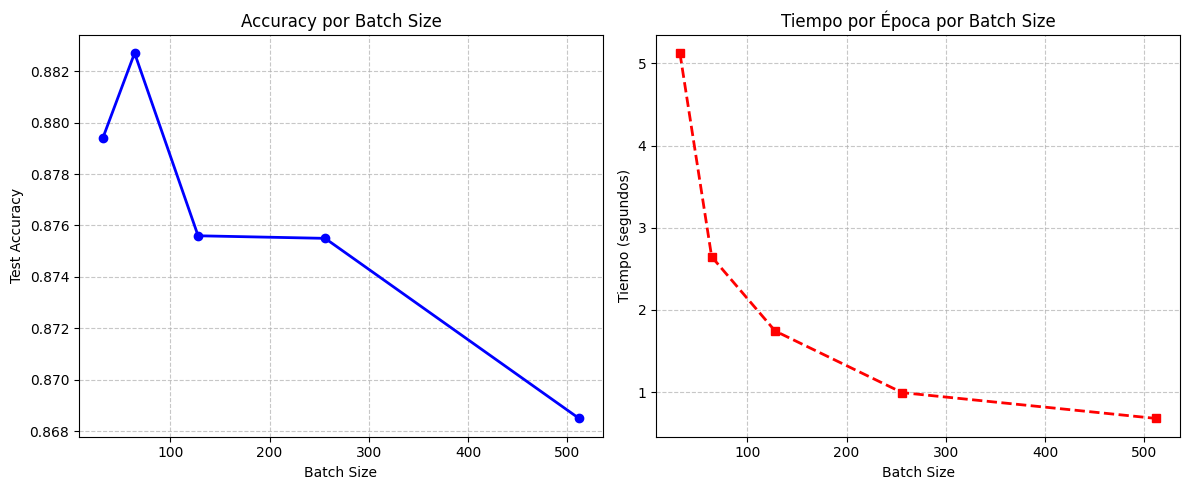

In [5]:
# Mostrar la tabla estilizada
styled_table

# Mostrar también los gráficos para mejor visualización
plt.figure(figsize=(12, 5))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, 'b-o', linewidth=2)
plt.title('Accuracy por Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico de tiempo
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, times_per_epoch, 'r--s', linewidth=2)
plt.title('Tiempo por Época por Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Tiempo (segundos)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## TABLA PROFESIONAL

In [7]:
# =============================================
# TABLA PROFESIONAL MEJORADA
# =============================================

from IPython.display import display, HTML

def create_fancy_table(results):
    # Estilos CSS para la tabla
    styles = """
    <style>
        .fancy-table {
            width: 80%;
            margin: 25px auto;
            border-collapse: collapse;
            box-shadow: 0 5px 15px rgba(0,0,0,0.1);
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            border-radius: 10px;
            overflow: hidden;
        }
        .fancy-table th {
            background-color: #2c3e50;
            color: white;
            padding: 15px;
            text-align: center;
            font-size: 15px;
            text-transform: uppercase;
            letter-spacing: 1px;
        }
        .fancy-table td {
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #e0e0e0;
            font-size: 14px;
        }
        .fancy-table tr:nth-child(even) {
            background-color: #f8f9fa;
        }
        .fancy-table tr:hover {
            background-color: #f1f1f1;
            transition: all 0.3s;
        }
        .fancy-table caption {
            caption-side: top;
            font-size: 18px;
            font-weight: bold;
            margin-bottom: 15px;
            color: #2c3e50;
        }
        .best-accuracy {
            background-color: #4CAF50 !important;
            color: white;
            font-weight: bold;
        }
        .best-time {
            background-color: #2196F3 !important;
            color: white;
            font-weight: bold;
        }
    </style>
    """

    # Crear HTML de la tabla
    table_html = f"""
    {styles}
    <table class="fancy-table">
        <caption>Resultados de Entrenamiento - Fashion MNIST</caption>
        <thead>
            <tr>
                <th>Batch Size</th>
                <th>Test Accuracy</th>
                <th>Tiempo/Época (s)</th>
            </tr>
        </thead>
        <tbody>
    """

    # Encontrar los mejores valores
    max_acc = max(results['Test Accuracy'])
    min_time = min(results['Tiempo por época (s)'])

    # Añadir filas de datos
    for _, row in results.iterrows():
        acc_class = "best-accuracy" if row['Test Accuracy'] == max_acc else ""
        time_class = "best-time" if row['Tiempo por época (s)'] == min_time else ""

        table_html += f"""
        <tr>
            <td>{int(row['Batch Size'])}</td>
            <td class="{acc_class}">{row['Test Accuracy']:.4f}</td>
            <td class="{time_class}">{row['Tiempo por época (s)']:.2f}</td>
        </tr>
        """

    table_html += """
        </tbody>
    </table>
    """

    display(HTML(table_html))


# Crear y mostrar la tabla profesional
create_fancy_table(results)



Batch Size,Test Accuracy,Tiempo/Época (s)
32,0.8794,5.13
64,0.8827,2.65
128,0.8756,1.74
256,0.8755,0.99
512,0.8685,0.68


## Conclusiones

In [8]:
# =============================================
# CONCLUSIONES CLARAS Y CONCISAS
# =============================================

# Encontrar los valores óptimos
max_acc = results['Test Accuracy'].max()
best_acc_batch = results.loc[results['Test Accuracy'] == max_acc, 'Batch Size'].values[0]

min_time = results['Tiempo por época (s)'].min()
best_time_batch = results.loc[results['Tiempo por época (s)'] == min_time, 'Batch Size'].values[0]

# Calcular diferencias porcentuales
acc_range = results['Test Accuracy'].max() - results['Test Accuracy'].min()
time_range = results['Tiempo por época (s)'].max() - results['Tiempo por época (s)'].min()

print("\n" + "="*60)
print(" "*20 + "CONCLUSIONES FINALES")
print("="*60)

print("\n🔍 RESULTADOS CLAVE:")
print(f"- Mejor accuracy: {max_acc:.4f} (Batch Size: {best_acc_batch})")
print(f"- Mejor tiempo/época: {min_time:.2f}s (Batch Size: {best_time_batch})")

print("\n📊 TENDENCIAS OBSERVADAS:")
print(f"- Batch sizes más grandes (512) son más rápidos que el más pequeño")
print(f"- La diferencia entre el mejor y peor accuracy fue de {acc_range*100:.2f}%")
print(f"- El tiempo varía en {time_range:.2f}s entre configuraciones")

print("\n💡 RECOMENDACIÓN:")
if best_acc_batch == best_time_batch:
    print(f"El Batch Size {best_acc_batch} ofrece el mejor equilibrio entre precisión y velocidad")
else:
    print(f"Para mejor precisión: usar Batch Size {best_acc_batch}")
    print(f"Para mayor velocidad: usar Batch Size {best_time_batch}")
    print(f"Recomendación balanceada: Batch Size {min(best_acc_batch, best_time_batch)}")

print("\n" + "="*60)


                    CONCLUSIONES FINALES

🔍 RESULTADOS CLAVE:
- Mejor accuracy: 0.8827 (Batch Size: 64)
- Mejor tiempo/época: 0.68s (Batch Size: 512)

📊 TENDENCIAS OBSERVADAS:
- Batch sizes más grandes (512) son más rápidos que el más pequeño
- La diferencia entre el mejor y peor accuracy fue de 1.42%
- El tiempo varía en 4.45s entre configuraciones

💡 RECOMENDACIÓN:
Para mejor precisión: usar Batch Size 64
Para mayor velocidad: usar Batch Size 512
Recomendación balanceada: Batch Size 64

